In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set()

In [2]:
%matplotlib inline

In [3]:
df_train = pd.read_csv("../data/train_users_2.csv")
df_test = pd.read_csv("../data/test_users.csv")
df_session = pd.read_csv("../data/sessions.csv")

In [4]:
df_submit = pd.read_csv("../data/sample_submission_NDF.csv")

In [5]:
set_train = set(df_train["id"].unique())
set_test = set(df_test["id"].unique())
set_session = set(df_session["user_id"].unique())

### 중복된 아이디 있는 지 확인

#### 1. train

In [6]:
len(df_train), len(df_train["id"].unique())

(213451, 213451)

#### 2. test

In [7]:
len(df_test), len(df_test["id"].unique())

(62096, 62096)

#### 3. submit

In [8]:
len(df_submit), len(df_submit["id"].unique())

(62096, 62096)

#### 4. session

In [9]:
len(df_session), len(set_session)

(10567737, 135484)

총 id 갯수는 135484개 이다. 

### sesion 내부 test와 train가 있는 지 확인

In [10]:
len(set_train), len(set_test), len(set_session)

(213451, 62096, 135484)

#### 1. session + train

In [26]:
len(set_train & set_session), len(set_train - set_session) 

(73815, 139636)

- train data 안에 id가 session에 있는 갯수 : 73815
- train data 안에 id가 session에 없는 갯수 : 139636

#### 2. session + test

In [27]:
len(set_test & set_session), len(set_test - set_session) 

(61668, 428)

- test data 안에 id가 session에 있는 갯수 : 61668
- test data 안에 id가 session에 없는 갯수 : 428

#### 3. session

In [13]:
len(set_session - (set_test | set_train))

1

- test와 train data 안에 id이외 session이 있는 갯수 : 1

In [14]:
li_no_log_train = list(set_train - set_session)

In [15]:
li_log_train = list(set_train & set_session)

In [16]:
import numpy as np

In [17]:
ar_idx_no_log = np.in1d(df_train["id"], li_no_log_train)

In [18]:
ar_idx_log = np.in1d(df_train["id"], li_log_train)

In [19]:
df_train_no_log = df_train.loc[ar_idx_no_log]
df_train_log = df_train.loc[ar_idx_log]

In [20]:
len(set(df_train_no_log["id"].unique()) & set(df_train_log["id"].unique()))

0

In [25]:
len(li_no_log_train), len(li_log_train)

(139636, 73815)

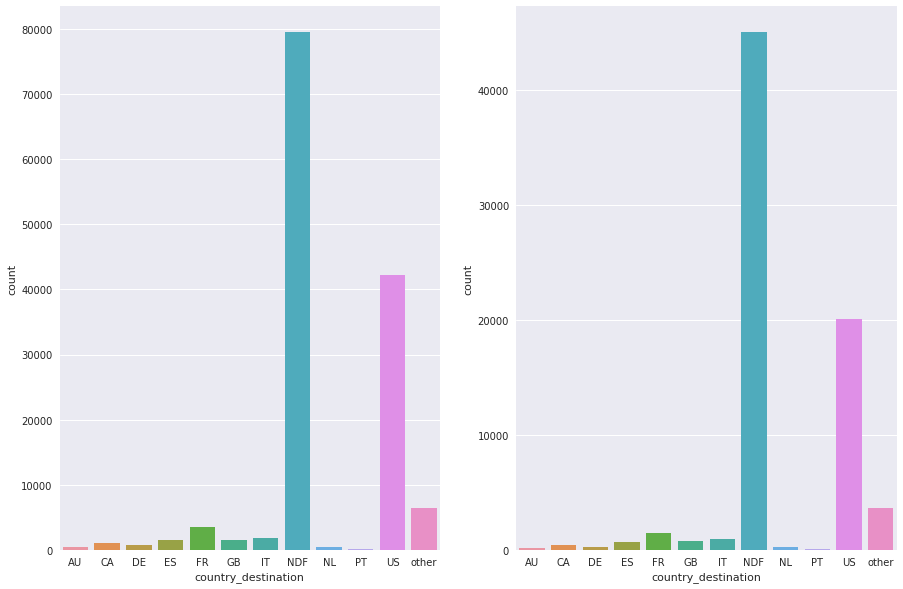

In [24]:
fig, axes = plt.subplots(1, 2, figsize = (15, 10))
sns.countplot(df_train_no_log["country_destination"].sort_values(), ax = axes[0])
sns.countplot(df_train_log["country_destination"].sort_values(), ax = axes[1])
# axes[0].set_ylim([0, 5000])
# axes[1].set_ylim([0, 2000])

### percentage 차이 (log 있는 것과 log

In [22]:
s_train_no_log_percentage = df_train_no_log["country_destination"].value_counts() / len(df_train_no_log) * 100
s_train_log_percentage = df_train_log["country_destination"].value_counts() / len(df_train_log) * 100

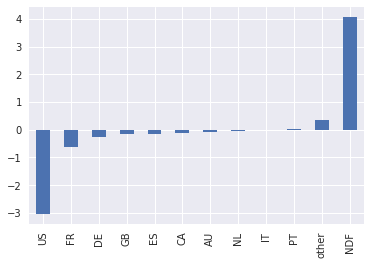

In [23]:
(s_train_log_percentage - s_train_no_log_percentage).sort_values().plot(kind="bar")

- session 정보가 있는 ID와 없는 ID의  destination의 차이는 별로 없다. 
- 랜덤적으로 정보가 session 정보가 없다는 의미!!